# Week3 - Homework

Write a rule based predictor for a given matrix

* Don't use a machine learning model (You can use PCA)

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [10]:
# Looking at the unique values in species column
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
# Analysing the metrics of the species Iris-setosa 
df[df['species'] == 'Iris-setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [8]:
# Analysing the metrics of the species Iris-versicolor 
df[df['species'] == 'Iris-versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [9]:
# Analysing the metrics of the species Iris-virginica
df[df['species'] == 'Iris-virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


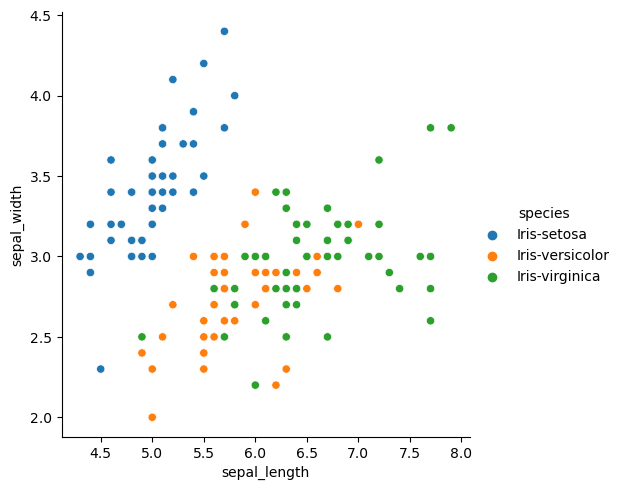

In [12]:
# Analysis on the metrics for rule based predictor by visualization for sepal_length and sepal_width
import seaborn as sns
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.show()

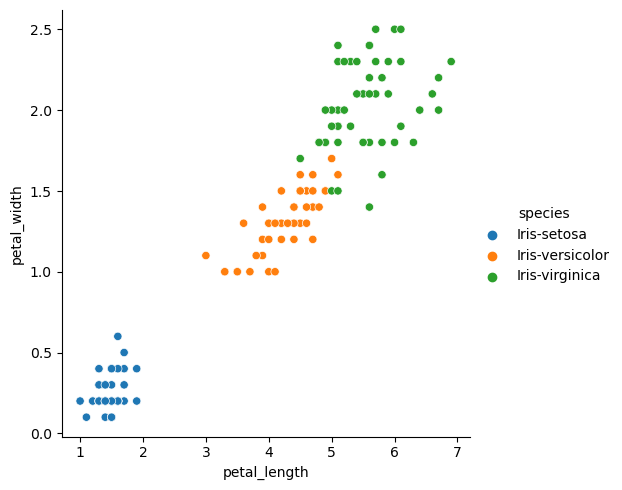

In [16]:
# Analysis on the metrics for rule based predictor by visualization for petal_length and petal_width
sns.relplot(x='petal_length', y='petal_width', hue='species', data=df)
plt.show()

### As you can clearly observe from the above two graphs petal_length and petal_width are the best metrics for classification

In [14]:
def predict_one(sepal_length, sepal_width, petal_length, petal_width):
    if petal_length < 2.7 and petal_width <=0.8:
        return 'Iris-setosa'
    elif petal_length >= 2.7 and petal_length <=5.1:
        if petal_width > 0.8 and petal_width <=1.8:
            return 'Iris-versicolor'
        else:
            return 'Iris-virginica'
    else:
        return 'Iris-virginica'

In [15]:
predictions = pd.Series([ predict_one(*line) for line in df.iloc[:, :4].to_numpy()])
accuracy = sum(df.species == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9466666666666667
